/content/ods_12:

Número de nós: 1587
Número de arestas: 29938
Assortatividade:  0.9715422500335406


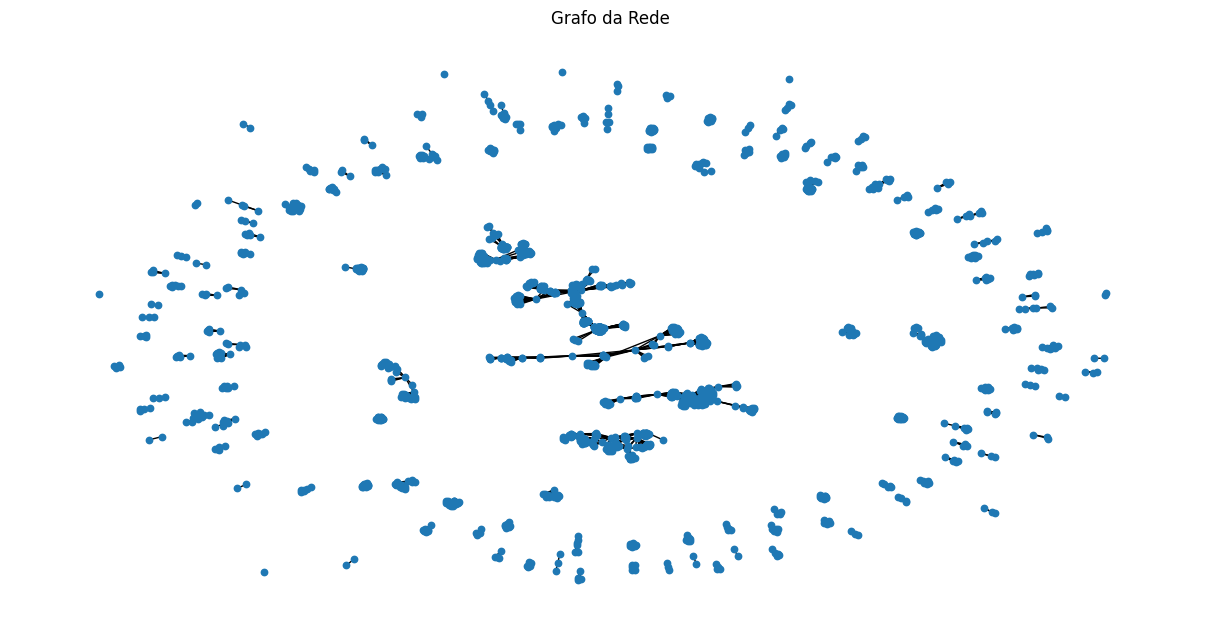

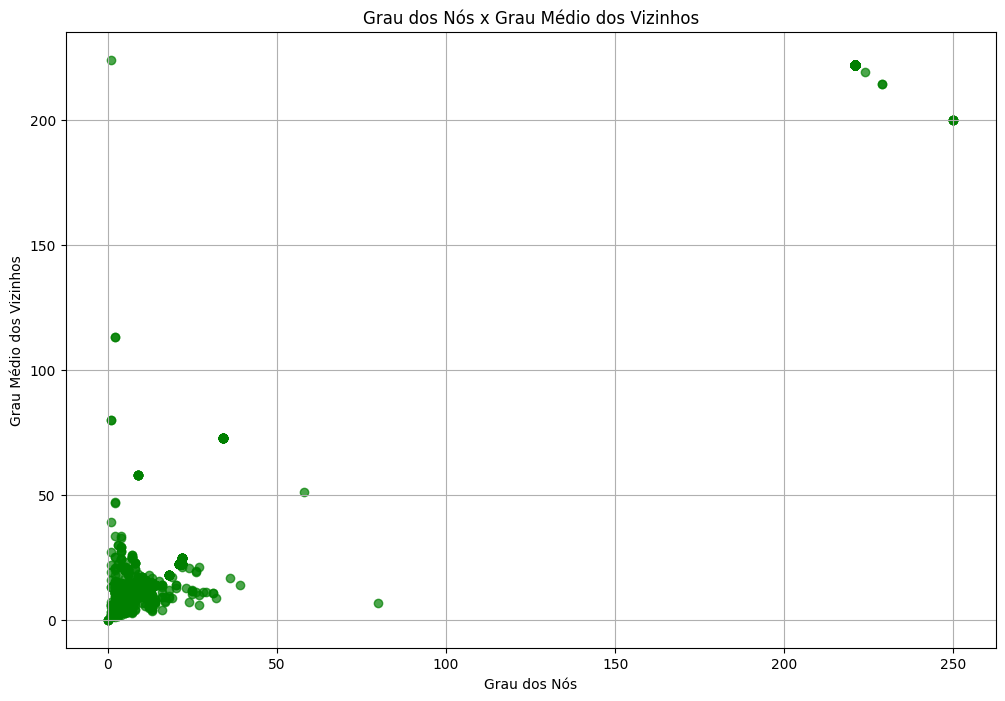

/content/ods_15:

Número de nós: 5532
Número de arestas: 889090
Assortatividade:  0.4871596928304268


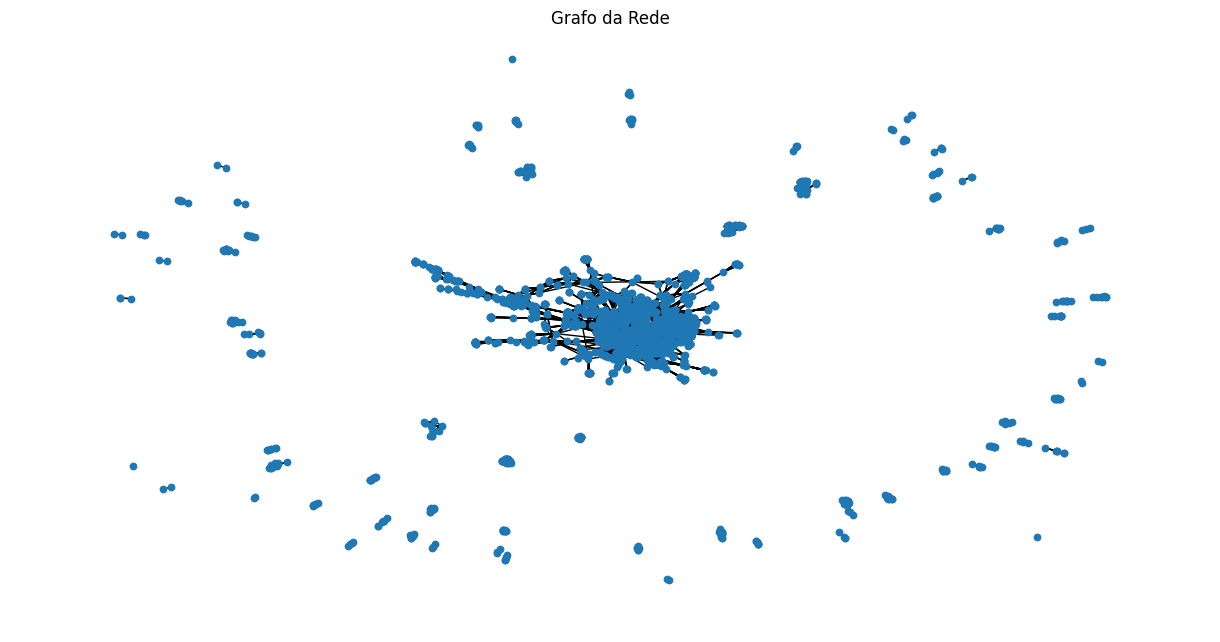

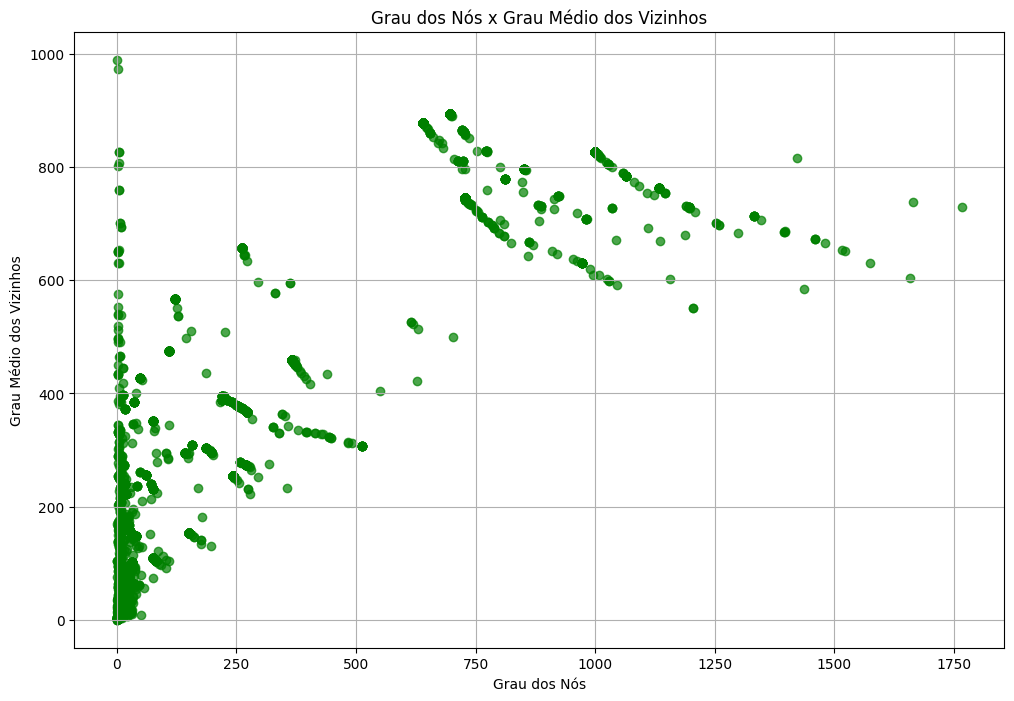

/content/ods_4:

Número de nós: 1227
Número de arestas: 5278
Assortatividade:  0.8236738065273636


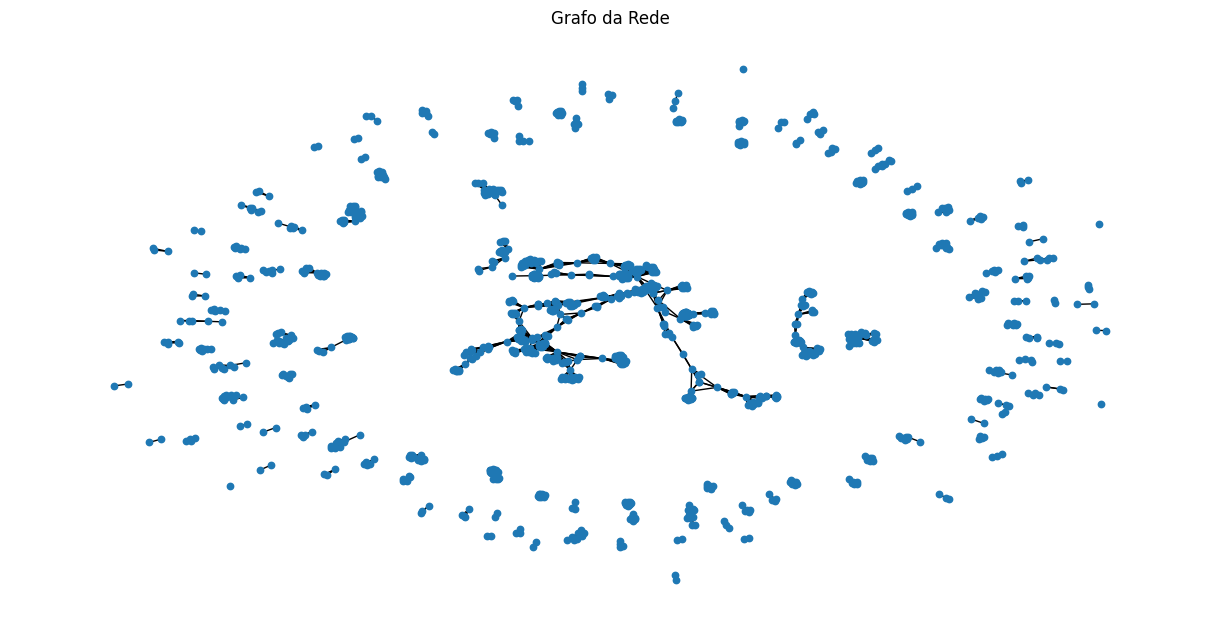

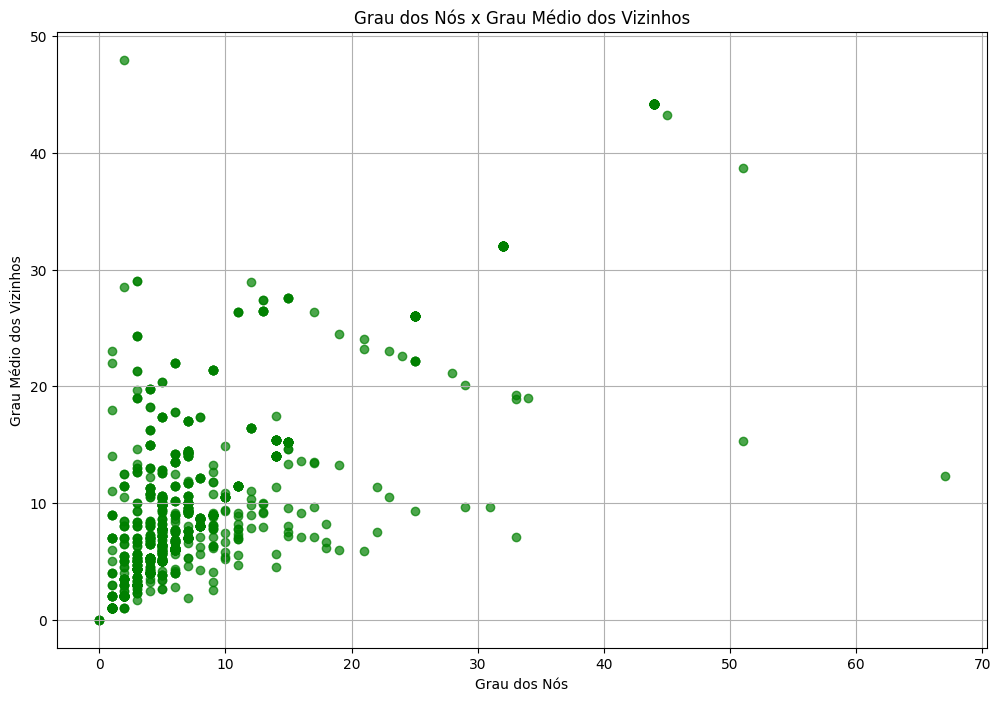

/content/ods_7:

Número de nós: 1913
Número de arestas: 7424
Assortatividade:  -0.010260050126892737


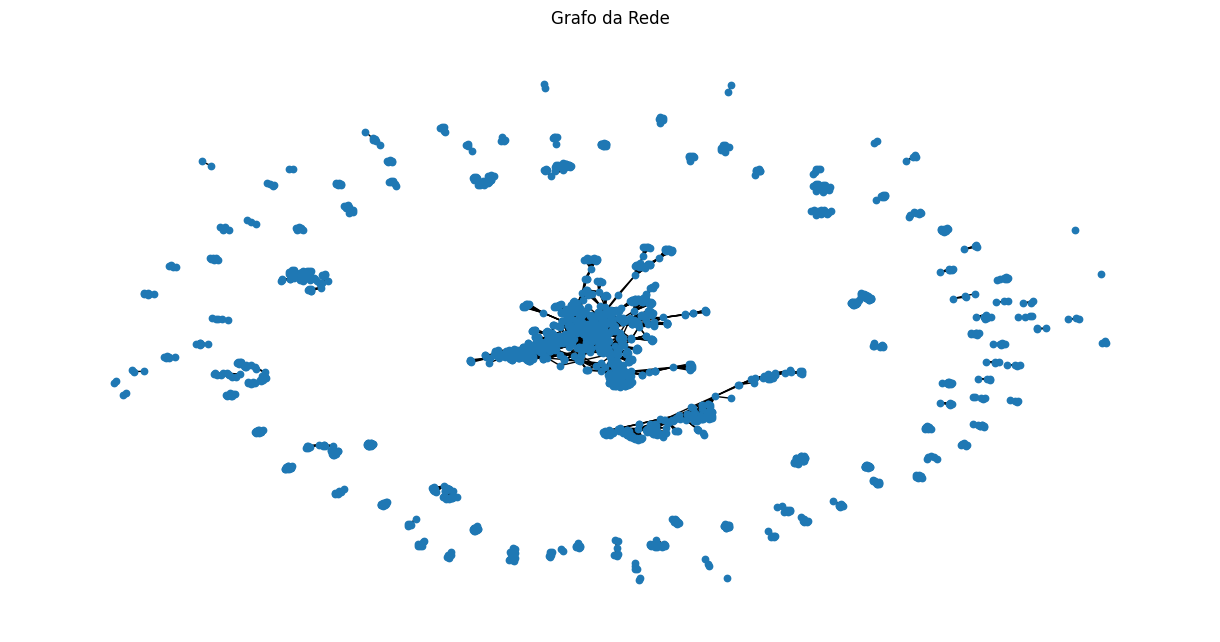

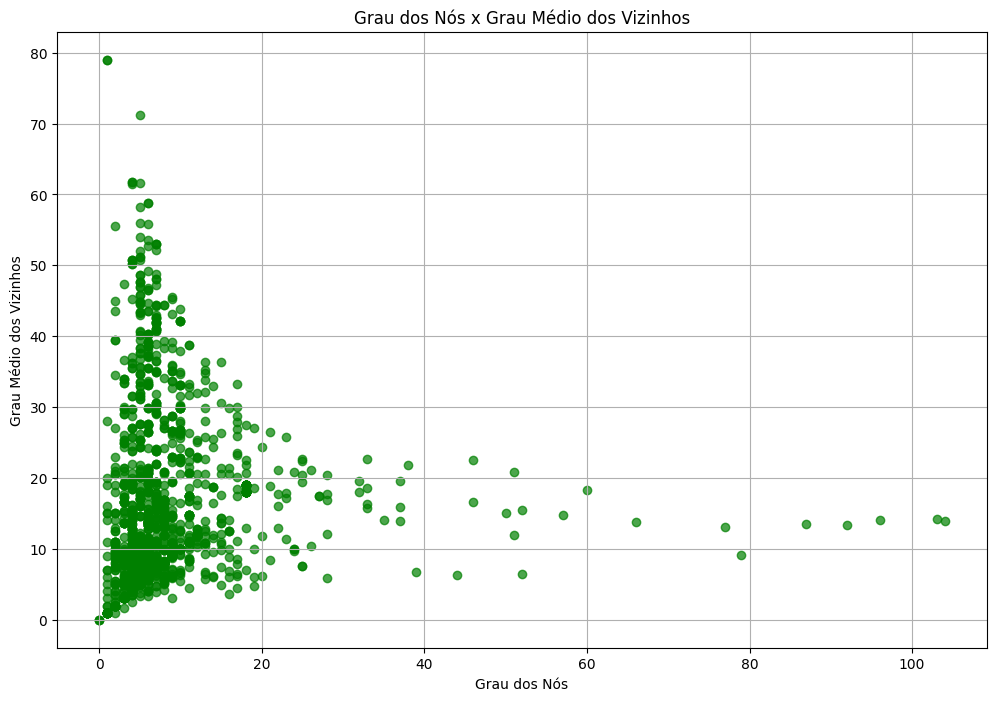

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite


def download_arquivos(num):
  # Carregando os arquivos CSV escolhidos para a realização do trabalho
  file_path = f'/content/ods_{num}.csv'
  df = pd.read_csv(file_path)

  # IDs dos autores e coautores
  author_ids = df['Author(s) ID'].str.split('; ')
  affiliations = df['Affiliations'].str.split('; ')

  # Inicializando o grafo 'G'
  G = nx.Graph()

  for author_list, affiliation_list in zip(author_ids, affiliations):
      if author_list and affiliation_list:
          # Adicionando nós para cada autor
          for author in author_list:
              G.add_node(author)
          # Criando arestas entre autores e coautores
          for i in range(len(author_list)):
              for j in range(i + 1, len(author_list)):
                  G.add_edge(author_list[i], author_list[j])


  # Exibindo informações básicas sobre a rede (nós e arestas)
  print(f"Número de nós: {G.number_of_nodes()}")
  print(f"Número de arestas: {G.number_of_edges()}")

  # Calcular a assortatividade em relação ao grau dos nós
  assortativity = nx.degree_assortativity_coefficient(G)
  print("Assortatividade: ",assortativity)

  return G


def plotar(G):

  # Calcular o grau dos nós e o grau médio dos vizinhos
  degree = dict(G.degree())
  avg_neighbor_degree = nx.average_neighbor_degree(G)

  # Preparando os dados para o gráfico a ser plotado
  degree_values = list(degree.values())
  avg_neighbor_degree_values = [avg_neighbor_degree[node] for node in G.nodes()]

  # Plotando a rede
  plt.figure(figsize=(12, 6))
  vis = nx.spring_layout(G, seed=45)  # Layout para visualização da rede
  nx.draw(G, vis, with_labels=False, node_size=21, font_size=9)
  plt.title("Grafo da Rede")
  plt.show()

  # Plotar grau dos nós x grau médio dos vizinhos
  plt.figure(figsize=(12, 8))
  plt.scatter(degree_values, avg_neighbor_degree_values, alpha=0.7, color='green')
  plt.title("Grau dos Nós x Grau Médio dos Vizinhos")
  plt.xlabel("Grau dos Nós")
  plt.ylabel("Grau Médio dos Vizinhos")
  plt.grid(True)
  plt.show()



ods_ = ['12','15','4','7']
for num in range(len(SDGs)):
  print(f'/content/ods_{ods_[num]}:\n')
  G = download_arquivos(ods_[num])
  plotar(G)
  print('===========================================================================')